<a href="https://colab.research.google.com/github/Nacho0611/Tarea2ML/blob/main/Tarea_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Valentina Flores`
  - `# Ignacio Maluenda`
- Usuario de GitHub (opcional):  `# Completar`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [ ]:
import pandas as pd
data = pd.concat([X, y], axis=1)

display(data.head())
data.info()

numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = data.select_dtypes(include=["object", "category", "bool"]).columns

#Varibles numéricas
display(data[numeric_cols].describe())

#Varibles categóricas
display(data[categorical_cols].describe())

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

job  marital  education default housing   loan   contact  \
count         44923    45211      43354   45211   45211  45211     32191   
unique           11        3          3       2       2      2         2   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211     8252  45211  
unique     12        3      2  
top       may  failure     no  
freq    13766     4901  39922

### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [ ]:
na_counts = data.isna().sum()
na_cols = na_counts[na_counts > 0]
display(na_cols)

from sklearn.impute import SimpleImputer

num_cols = data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = data.select_dtypes(include=["object", "category"]).columns

# Imputación NaN: variables numéricas con la mediana
for col in num_cols:
    if data[col].isna().sum() > 0:
        mediana = data[col].median()
        data[col] = data[col].fillna(mediana)

# Imputación NaN: variables categóricas con la moda
for col in cat_cols:
    if data[col].isna().sum() > 0:
        moda = data[col].mode()[0]
        data[col] = data[col].fillna(moda)

data.head()




Series([], dtype: int64)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

    contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
0  cellular            5   may       261         1     -1         0  failure   
1  cellular            5   may       151         1     -1         0  failure   
2  cellular            5   may        76         1     -1         0  failure   
3  cellular            5   may        92         1     -1         0  failure   
4  cellular            5   may       198         1     -1         0  failure   

    y  
0  no  
1  no  
2  no  
3  no  
4  no




---


Las variables *job*, *education*, *contact* y *poutcome* presentan valores missings. Para las variables *job* y *education* tienen cerca de un 1% y 5% de missings, respectivamente. Para las variables *contact* y *poutcome* requieren más análisis ya que los missings representan un 15% y 50%, respectivamente, de valores missings.

Como método de imputación de los valores NaN se decide utilizar la mediana para variables numéricas, ya que es más robusta ante outliers. Para las variables categóricas, se imputan con su moda, por ser la más representativa.



---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

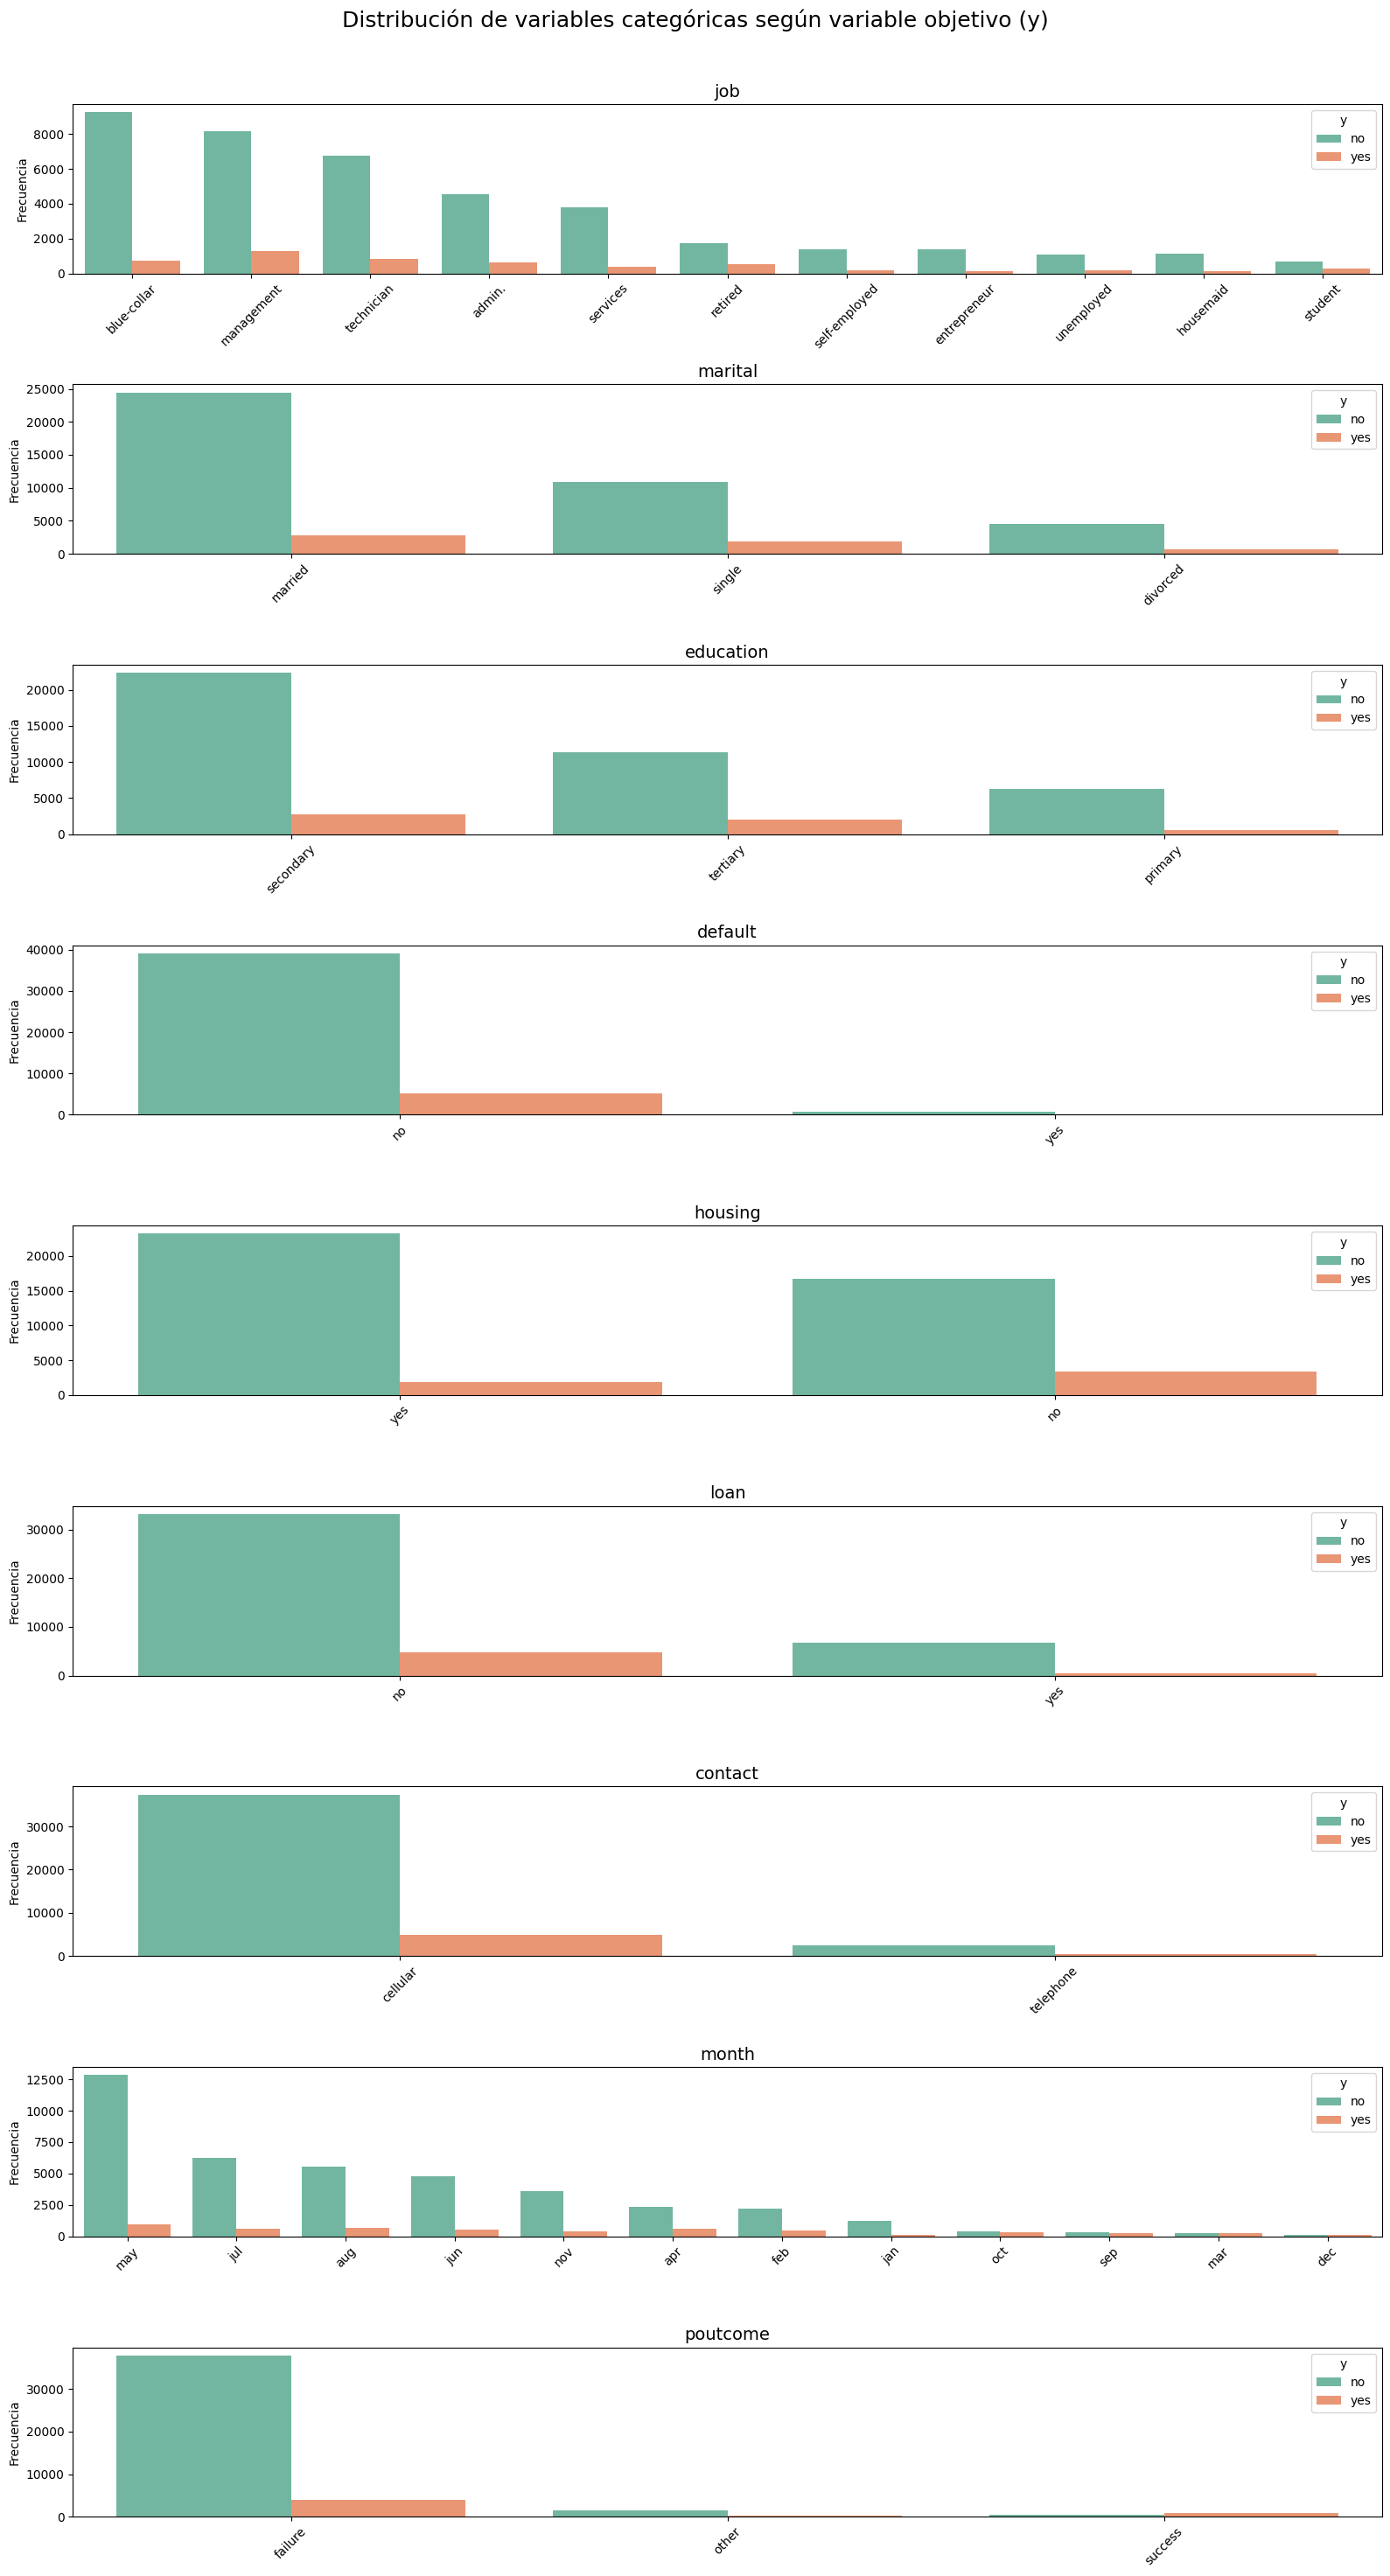

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo variables categóricas
categorical_cols = data.select_dtypes(include=["object", "category"]).columns.drop("y")

# Detalles gráficos
plt.figure(figsize=(16, 30))
plt.suptitle("Distribución de variables categóricas según variable objetivo (y)", fontsize=18)

# Gráfico para cada variable categórica
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=data, x=col, hue="y", palette="Set2", order=data[col].value_counts().index)
    plt.title(f"{col}", fontsize=14)
    plt.xlabel("")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()




---

Se puede observar una relación notoria entre algunas de estas variables categóricas. Por ejemplo, *poutcome* aquellos clientes que anteriormente su campaña haya sido 'succes' tienen una mayor probabilidad de realizar un depósito. También algunas ocupaciones muestran una mayor tasa de aceptación como ser estudiante. La forma de contacto también parecería tener una tasa de aceptación importante. Default, Loan y Housing tienen diferencias más pequeñas pero podrían amplificar los efectos si se mezclan con otras.

---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

In [ ]:
# Paso 1: Seleccionar variables numéricas
num_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Paso 2: Función para detectar outliers usando 1.5 × IQR
outlier_info = {}

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = len(outliers)

# Mostrar cantidad de outliers por variable
print("Cantidad de outliers detectados por variable numérica:")
for col, count in outlier_info.items():
    print(f"{col}: {count} observaciones")





Cantidad de outliers detectados por variable numérica:
age: 487 observaciones
balance: 4729 observaciones
day_of_week: 0 observaciones
duration: 3235 observaciones
campaign: 3064 observaciones
pdays: 8257 observaciones
previous: 8257 observaciones





---


Se reemplazan los outliers con los límites superior e inferior.

---

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de prueba. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?




---


*Escriba* su respuesta en esta celda...


---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra de prueba. ¿Considera que es un buen valor? Comente.




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?





---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random orest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.



---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).




---


*Escriba* su respuesta en esta celda...


---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [4]:
import pandas as pd

# Paso 1: Cargar la base de datos desde el link
url = "https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv"
df = pd.read_csv(url)

df.head()

Series Name        Series Code    Country Name Country Code  \
0  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG     Afghanistan          AFG   
1  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Albania          ALB   
2  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Algeria          DZA   
3  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG  American Samoa          ASM   
4  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Andorra          AND   

      2023 [YR2023]  
0  2.71088679128353  
1  3.93662525742167  
2  4.10000000000004  
3                ..  
4  2.58355480961319

In [5]:
# Mostrar todas las filas y columnas temporalmente
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Mostrar toda la base
df

Series Name        Series Code  \
0                                 GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
1                                 GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
2                                 GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
3                                 GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
4                                 GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
5                                 GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
6                                 GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
7                                 GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
8                                 GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
9                                 GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
10                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
11                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
12                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
13                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
14                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
15                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
16                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
17                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
18                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
19                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
20                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
21                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
22                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
23                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
24                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
25                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
26                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
27                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
28                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
29                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
30                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
31                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
32                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
33                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
34                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
35                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
36                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
37                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
38                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
39                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
40                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
41                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
42                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
43                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
44                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
45                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
46                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
47                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
48                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
49                                GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
50                                GDP growth (annual %)  NY.GDP.MK

In [6]:
# Eliminar columnas innecesarias
df = df.drop(columns=["Series Code", "Country Code"])



In [7]:
# De long a wide
df_1 = df.pivot(index="Country Name", columns="Series Name", values="2023 [YR2023]")



In [8]:
df_1.reset_index(inplace=True)
df_1.head()

Series Name                 Country Name  \
0                            Afghanistan   
1            Africa Eastern and Southern   
2             Africa Western and Central   
3                                Albania   
4                                Algeria   

Series Name Agricultural raw materials exports (% of merchandise exports)  \
0                                                           ..              
1                                             1.93287526195653              
2                                             3.80482687815641              
3                                            0.406032063201426              
4                                                           ..              

Series Name Computer; communications and other services (% of commercial service exports)  \
0                                                           ..                              
1                                             35.9298385263195                              
2                                             23.7057568350145                              
3                                             24.4301090197124                              
4                                             59.1626427564765                              

Series Name Exports of goods and services (% of GDP)  \
0                                   16.7751362822863   
1                                   24.3483372544611   
2                                                 ..   
3                                   38.6650817896799   
4                                   23.6195363708424   

Series Name Food exports (% of merchandise exports)  \
0                                                ..   
1                                   14.285851632509   
2                                  12.9874441377748   
3                                  11.9640780632637   
4                                                ..   

Series Name Fuel exports (% of merchandise exports) GDP growth (annual %)  \
0                                                ..      2.71088679128353   
1                                  25.4254224001233      2.32013780158925   
2                                  61.3705691120184       3.3547328190002   
3                                  6.34538423879421      3.93662525742167   
4                                                ..      4.10000000000004   

Series Name High-technology exports (% of manufactured exports)  \
0                                                           ..    
1                                             5.80516538196113    
2                                                           ..    
3                                            0.682326849473647    
4                                                           ..    

Series Name ICT service exports (% of service exports; BoP)  \
0                                                        ..   
1                                          6.10657347896149   
2                                          5.69176863421842   
3                                          3.01397608748124   
4                                          2.21311390791552   

Series Name Insurance and financial services (% of service exports; BoP)  \
0                                                           ..             
1                                             6.08028700896879             
2                                             14.9934752391386             
3                                            0.662505307988438             
4                                             10.2830758414755             

Series Name International tourism; receipts (% of total exports)  \
0                                                           ..     
1                                                           ..     
2                                                           ..     
3                                                           ..     
4  

In [26]:
df_1.shape

(266, 17)

### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [9]:
sacar = [
    "Africa Eastern and Southern", "Africa Western and Central", "Arab World",
    "Caribbean small states", "Central Europe and the Baltics", "Early-demographic dividend",
    "East Asia & Pacific", "East Asia & Pacific (IDA & IBRD countries)",
    "East Asia & Pacific (excluding high income)", "Euro area", "Europe & Central Asia",
    "Europe & Central Asia (IDA & IBRD countries)", "Europe & Central Asia (excluding high income)",
    "European Union", "Fragile and conflict affected situations",
    "Heavily indebted poor countries (HIPC)", "High income", "IBRD only",
    "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", "Late-demographic dividend",
    "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Least developed countries: UN classification", "Low & middle income", "Low income",
    "Lower middle income", "Middle East & North Africa",
    "Middle East & North Africa (IDA & IBRD countries)",
    "Middle East & North Africa (excluding high income)", "Middle income", "North America",
    "Not classified", "OECD members", "Other small states", "Pacific island small states",
    "Post-demographic dividend", "Pre-demographic dividend", "Small states", "South Asia",
    "South Asia (IDA & IBRD)", "Sub-Saharan Africa", "Sub-Saharan Africa (IDA & IBRD countries)",
    "Sub-Saharan Africa (excluding high income)", "Upper middle income", "World"
]

df_1 = df_1[~df_1["Country Name"].isin(sacar)]

# Verificar que se eliminaron correctamente
df_1.shape


(217, 17)

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [10]:
import numpy as np

# Reemplazar todos los valores ".." por NA
df_1.replace("..", np.nan, inplace=True)


<ipython-input-10-d6965a4296b0>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1.replace("..", np.nan, inplace=True)


In [11]:
# A tipo numérico
for col in df_1.columns:
    if col != "Country Name":
        df_1[col] = pd.to_numeric(df_1[col], errors="coerce")

df_1.head()


Series Name    Country Name  \
0               Afghanistan   
3                   Albania   
4                   Algeria   
5            American Samoa   
6                   Andorra   

Series Name  Agricultural raw materials exports (% of merchandise exports)  \
0                                                          NaN               
3                                                     0.406032               
4                                                          NaN               
5                                                          NaN               
6                                                     0.415383               

Series Name  Computer; communications and other services (% of commercial service exports)  \
0                                                          NaN                               
3                                                    24.430109                               
4                                                    59.162643                               
5                                                          NaN                               
6                                                    12.881184                               

Series Name  Exports of goods and services (% of GDP)  \
0                                           16.775136   
3                                           38.665082   
4                                           23.619536   
5                                                 NaN   
6                                                 NaN   

Series Name  Food exports (% of merchandise exports)  \
0                                                NaN   
3                                          11.964078   
4                                                NaN   
5                                                NaN   
6                                           1.089864   

Series Name  Fuel exports (% of merchandise exports)  GDP growth (annual %)  \
0                                                NaN               2.710887   
3                                           6.345384               3.936625   
4                                                NaN               4.100000   
5                                                NaN                    NaN   
6                                           0.010148               2.583555   

Series Name  High-technology exports (% of manufactured exports)  \
0                                                          NaN     
3                                                     0.682327     
4                                                          NaN     
5                                                          NaN     
6                                                    21.434632     

Series Name  ICT service exports (% of service exports; BoP)  \
0                                                        NaN   
3                                                   3.013976   
4                                                   2.213114   
5                                                        NaN   
6                                                   4.348926   

Series Name  Insurance and financial services (% of service exports; BoP)  \
0                                                          NaN              
3                                                     0.662505              
4                                                    10.283076              
5                                                          NaN              
6                                                     3.728244              

Series Name  International tourism; receipts (% of total exports)  \
0                                                          NaN      
3                                                          NaN      
4                                                          NaN      
5                                                          NaN      
6                     

In [12]:
# Estadisticas descriptivas
df_1.describe()

Series Name  Agricultural raw materials exports (% of merchandise exports)  \
count                                               149.000000               
mean                                                  2.726255               
std                                                   7.416283               
min                                                   0.000000               
25%                                                   0.343928               
50%                                                   0.794963               
75%                                                   2.120083               
max                                                  63.703068               

Series Name  Computer; communications and other services (% of commercial service exports)  \
count                                               161.000000                               
mean                                                 35.005284                               
std                                                  23.550764                               
min                                                   0.935706                               
25%                                                  13.309551                               
50%                                                  32.273353                               
75%                                                  53.862266                               
max                                                  95.860793                               

Series Name  Exports of goods and services (% of GDP)  \
count                                      158.000000   
mean                                        45.398868   
std                                         33.331007   
min                                          1.108109   
25%                                         23.637110   
50%                                         38.790357   
75%                                         56.494967   
max                                        212.530618   

Series Name  Food exports (% of merchandise exports)  \
count                                     149.000000   
mean                                       24.136526   
std                                        23.862474   
min                                         0.079874   
25%                                         8.338115   
50%                                        15.056512   
75%                                        32.790842   
max                                        98.210416   

Series Name  Fuel exports (% of merchandise exports)  GDP growth (annual %)  \
count                                     145.000000             195.000000   
mean                                       14.275881               3.241160   
std                                        23.215387               6.641153   
min                                         0.000000             -20.111576   
25%                                         0.498740               1.168088   
50%                                         4.097826               2.960181   
75%                                        15.770449               4.987486   
max                                        95.516439              75.061377   

Series Name  High-technology exports (% of manufactured exports)  \
count                                               147.000000     
mean                                                 11.352849     
std                                                  13.507894     
min                                                   0.000000     
25%                                                   2.226174     
50%                                                   6.030929     
75%                                                  16.841983     
max                                                  72.315489     

Series Name  ICT service exports (% of service exports; BoP)  \
count                                     

### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

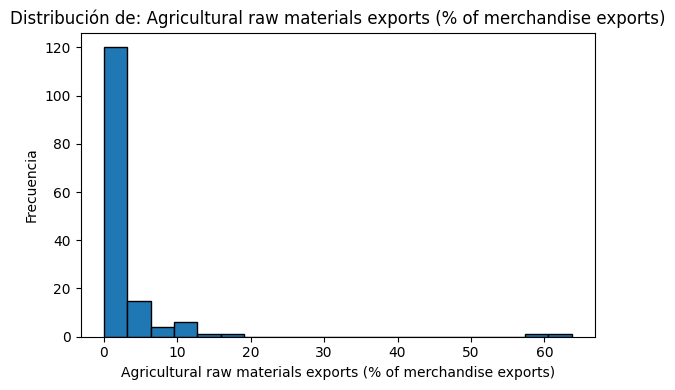

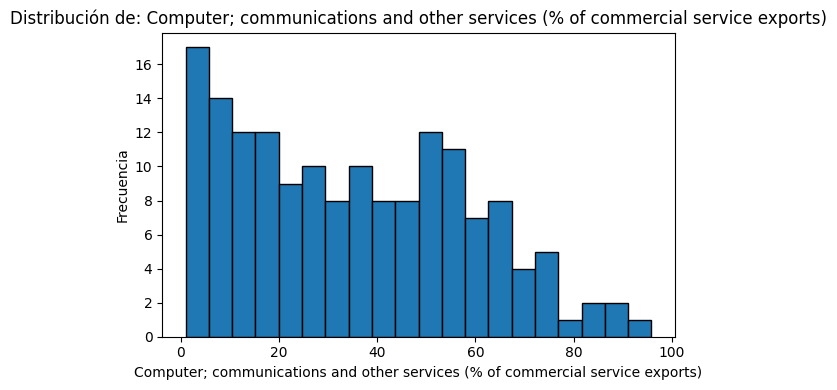

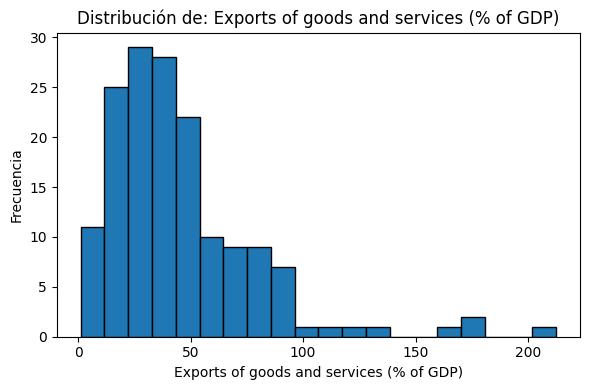

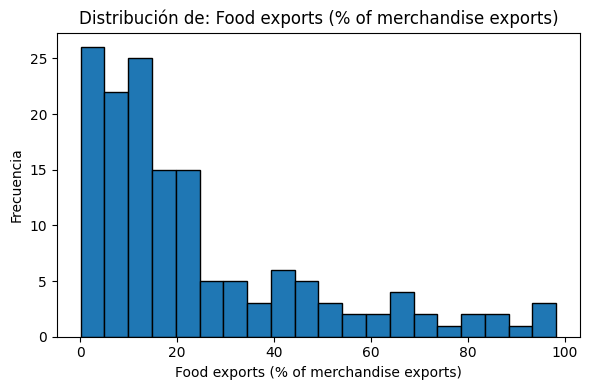

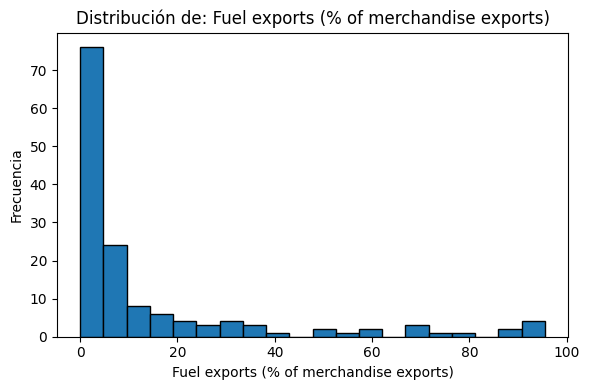

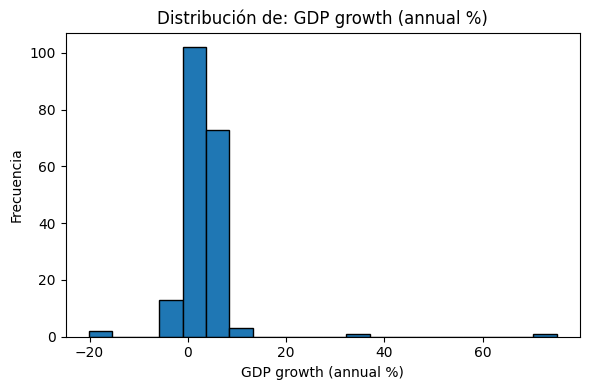

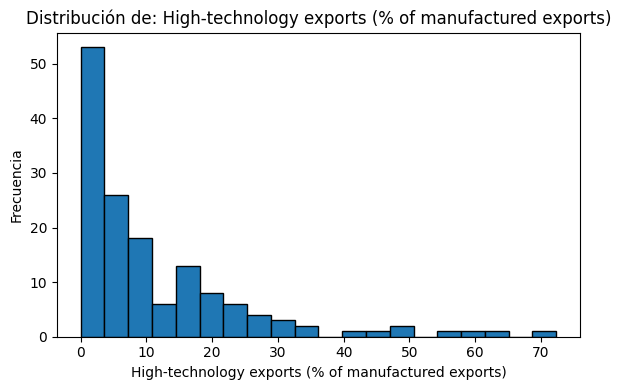

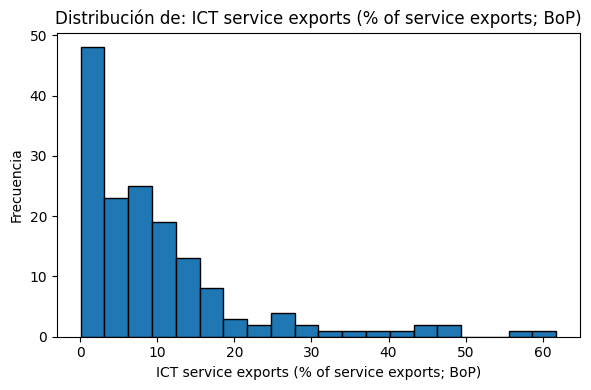

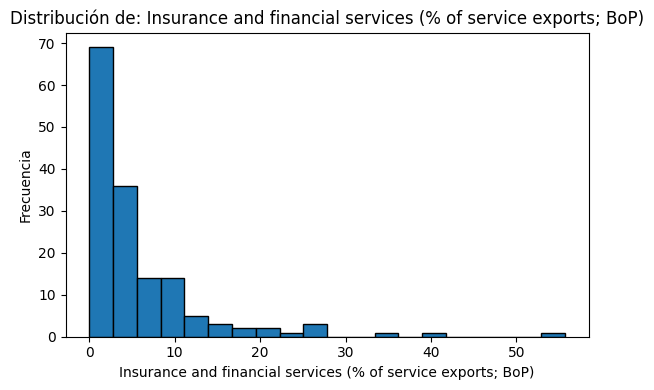

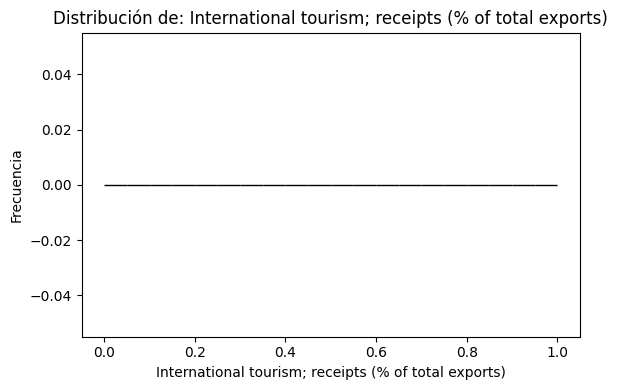

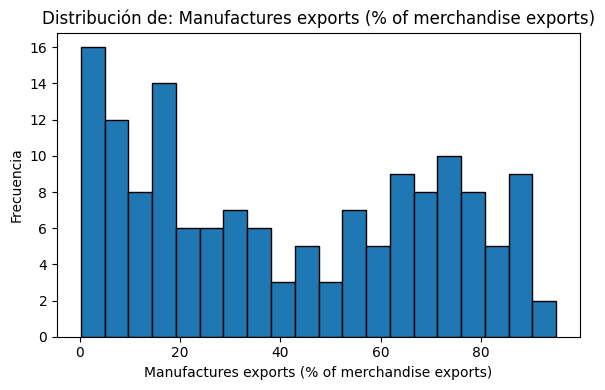

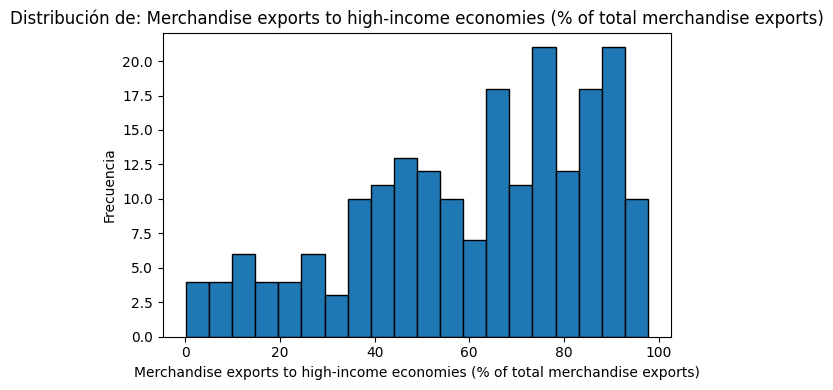

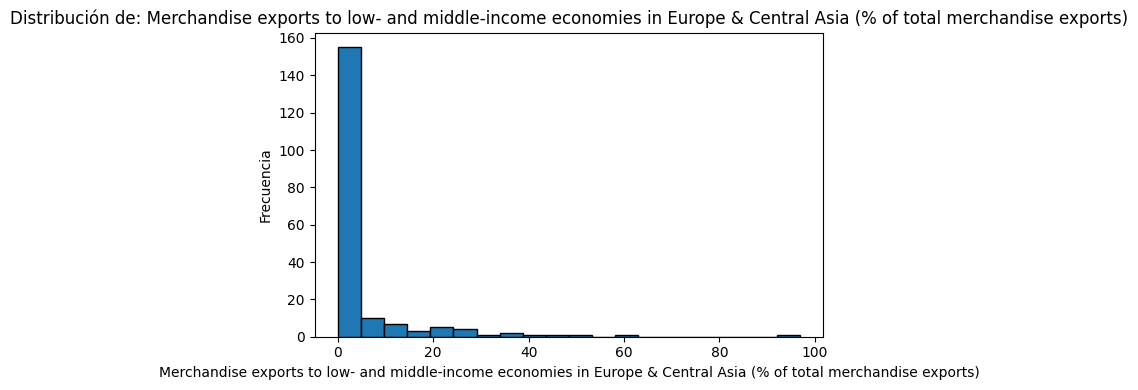

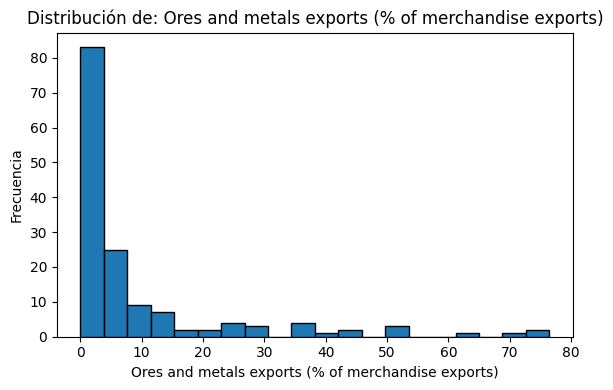

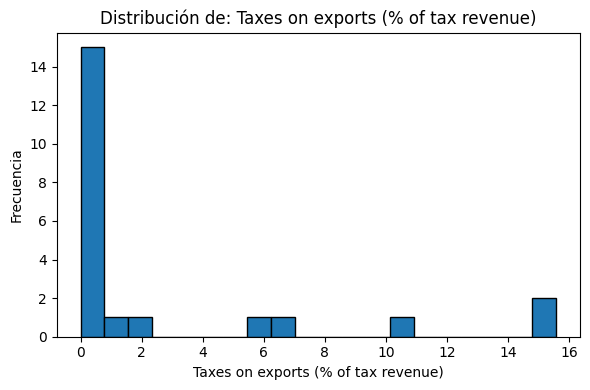

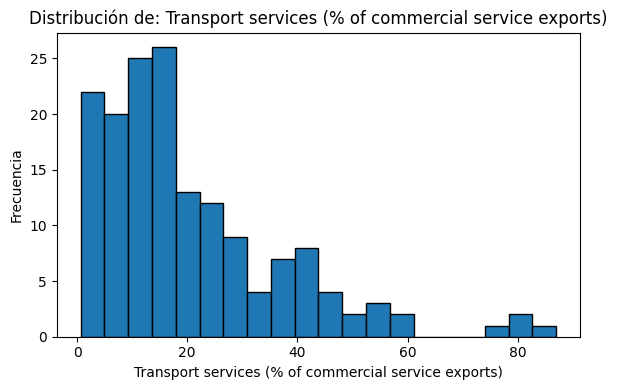

In [13]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_cols = df_1.select_dtypes(include='number').columns

# Graficar histogramas
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    df_1[col].hist(bins=20, edgecolor='black')
    plt.title(f"Distribución de: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(False)
    plt.tight_layout()
    plt.show()





---

- **Agricultural raw materials exports (% of merchandise exports)**: Distribución fuertemente asimétrica a la derecha. Más de la mitad de los países exporta menos del 5% en esta categoría, mientras que unos pocos alcanzan valores por sobre el 60%.

- **Computer; communications and other services (% of commercial service exports)**: Distribución relativamente uniforme. Los valores están bien repartidos entre 0% y 100%, lo que indica heterogeneidad entre países.

- **Exports of goods and services (% of GDP)**: Distribución asimétrica a la derecha. La mayoría de los países se concentra entre 20% y 60%, pero algunos superan el 100%, lo que refleja alta apertura comercial.

- **Food exports (% of merchandise exports)**: Distribución asimétrica a la derecha, con moda cerca del 10%. Algunos países superan el 60%, lo que refleja especialización exportadora en alimentos.

- **Fuel exports (% of merchandise exports)**: Distribución muy sesgada a la derecha. La mayoría de los países exporta poco combustible, pero unos pocos superan el 80%.

- **GDP growth (annual %)**: Distribución concentrada entre 0% y 5%, con algunos valores extremos positivos y negativos que reflejan shocks o recuperaciones excepcionales.

- **High-technology exports (% of manufactured exports)**: Distribución asimétrica a la derecha, con mayoría bajo el 10%. Unos pocos países líderes superan el 50%.

- **ICT service exports (% of service exports; BoP)**: Distribución muy concentrada en valores bajos (0%–10%). Algunos países superan el 30%, señalando liderazgo en exportaciones TIC.

- **Insurance and financial services (% of service exports; BoP)**: Distribución sesgada a la derecha. La mayoría está bajo el 10%, con algunos países por sobre 30%, reflejando centros financieros.

- **International tourism, receipts (% of total exports)**: Todos los valores son 0 o faltantes. No se reportaron datos válidos en 2023 para esta variable.

- **Manufactures exports (% of merchandise exports)**: Distribución bimodal. Un grupo de países exporta menos del 20%, mientras otro supera el 60%, indicando distintos niveles de industrialización.

- **Merchandise exports to high-income economies (% of total merchandise exports)**: Distribución asimétrica a la izquierda. Muchos países exportan más del 60% a economías desarrolladas.

- **Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)**: Distribución fuertemente sesgada a la derecha. Casi todos exportan menos del 10% a esta región.

- **Ores and metals exports (% of merchandise exports)**: Distribución asimétrica a la derecha. La mayoría exporta muy poco, pero unos pocos países alcanzan más del 50%.

- **Taxes on exports (% of tax revenue)**: Distribución altamente concentrada en cero. La mayoría no aplica impuestos a las exportaciones, salvo casos puntuales.

- **Transport services (% of commercial service exports)**: Distribución asimétrica a la derecha. La mayoría se concentra bajo el 20%, pero algunos países superan el 60%.

- **Travel services (% of commercial service exports)**: Distribución diversa con moda entre 10% y 30%. Algunos países altamente turísticos superan el 50%.



---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


In [14]:
# Conteo de nulos por columna
faltantes_col = df_1.isna().sum().sort_values(ascending=False)
print(faltantes_col)

# También porcentaje de nulos por columna
porcentaje_col = df_1.isna().mean().sort_values(ascending=False) * 100
print(porcentaje_col)

Series Name
International tourism; receipts (% of total exports)                                                                 217
Taxes on exports (% of tax revenue)                                                                                  195
Fuel exports (% of merchandise exports)                                                                               72
High-technology exports (% of manufactured exports)                                                                   70
Manufactures exports (% of merchandise exports)                                                                       68
Agricultural raw materials exports (% of merchandise exports)                                                         68
Ores and metals exports (% of merchandise exports)                                                                    68
Food exports (% of merchandise exports)                                                                               68
Insurance and financ

In [15]:
# Crear una copia de df_1 para trabajar
df_2 = df_1.copy()

# Eliminar columnas específicas con más de 85% de NaN
columnas_a_eliminar = [
    "International tourism; receipts (% of total exports)",
    "Taxes on exports (% of tax revenue)"
]

df_2 = df_2.drop(columns=columnas_a_eliminar)


In [16]:
# Asegurarse de que todas las columnas numéricas estén bien convertidas
for col in df_2.columns:
    if col != "Country Name":
        df_2[col] = pd.to_numeric(df_2[col], errors='coerce')  # por si aún queda algún ".."

# Imputar con la mediana por columna
for col in df_2.columns:
    if col != "Country Name":
        df_2[col] = df_2[col].fillna(df_2[col].median())


Se realizó un análisis detallado de los valores faltantes a nivel de variable. Se aplicaron distintos métodos de tratamiento en función del porcentaje de datos ausentes y la naturaleza de las variables, siguiendo criterios de imputación presentados en el material del curso (PDF AMLE-3-EDA).

🔴 1. Eliminación de columnas con más del 85% de valores faltantes
Se eliminaron las siguientes variables:

International tourism; receipts (% of total exports) (100% faltantes)
Taxes on exports (% of tax revenue) (89.86% faltantes)
Este tipo de columnas no aporta información útil al análisis y, como se explica en el PDF, cuando una mayoría abrumadora de observaciones están ausentes, la imputación introduce más ruido que valor. Suponiendo un mecanismo no aleatorio en los faltantes, imputar aquí sería altamente especulativo.

🟡 2. Imputación de variables con entre 25% y 35% de faltantes
Para las variables restantes con faltantes moderados (como Fuel exports, High-tech exports, Manufactures exports, entre otras), se optó por imputar usando la mediana. Esta decisión se basó en las siguientes consideraciones:

La mediana es robusta a valores extremos, lo cual es importante dado que muchas de estas variables presentan distribuciones asimétricas (según lo observado en la pregunta 2.3).
La imputación con media puede sesgar resultados cuando hay outliers, ya que reduce artificialmente la varianza y puede distorsionar correlaciones.
Las modas no son útiles en datos continuos como estos, ya que rara vez hay valores repetidos.
Métodos más complejos como regresión o imputación múltiple (opciones 4 y 6 del PDF) requieren supuestos más fuertes y no garantizan mejoras si no se justifica una fuerte correlación con otras variables.
No se aplica interpolación (opción 5) porque no se trata de series de tiempo, sino de datos transversales para un único año (2023).
En resumen, la imputación por mediana logra un equilibrio entre simplicidad, robustez y fidelidad a la estructura de los datos.

✅ Resultado
Tras aplicar esta estrategia combinada, el DataFrame resultante no contiene valores nulos, y mantiene el mayor número posible de observaciones por país. Esto permite continuar con análisis como PCA y clustering sin comprometer la calidad del set de datos.

In [17]:
# Revisar que no hayan más NA
df_2

Series Name                    Country Name  \
0                               Afghanistan   
3                                   Albania   
4                                   Algeria   
5                            American Samoa   
6                                   Andorra   
7                                    Angola   
8                       Antigua and Barbuda   
10                                Argentina   
11                                  Armenia   
12                                    Aruba   
13                                Australia   
14                                  Austria   
15                               Azerbaijan   
16                                  Bahamas   
17                                  Bahrain   
18                               Bangladesh   
19                                 Barbados   
20                                  Belarus   
21                                  Belgium   
22                                   Belize   
23                                    Benin   
24                                  Bermuda   
25                                   Bhutan   
26                                  Bolivia   
27                   Bosnia and Herzegovina   
28                                 Botswana   
29                                   Brazil   
30                   British Virgin Islands   
31                        Brunei Darussalam   
32                                 Bulgaria   
33                             Burkina Faso   
34                                  Burundi   
35                               Cabo Verde   
36                                 Cambodia   
37                                 Cameroon   
38                                   Canada   
40                           Cayman Islands   
41                 Central African Republic   
43                                     Chad   
44                          Channel Islands   
45                                    Chile   
46                                    China   
47                                 Colombia   
48                                  Comoros   
49                          Congo Dem. Rep.   
50                               Congo Rep.   
51                               Costa Rica   
52                            Cote d'Ivoire   
53                                  Croatia   
54                                     Cuba   
55                                  Curacao   
56                                   Cyprus   
57                                  Czechia   
58                                  Denmark   
59                                 Djibouti   
60                                 Dominica   
61                       Dominican Republic   
66                                  Ecuador   
67                                    Egypt   
68                              El Salvador   
69                        Equatorial Guinea   
70                                  Eritrea   
71                                  Estonia   
72                                 Eswatini   
73                                 Ethiopia   
79                            Faroe Islands   
80                                     Fiji   
81                                  Finland   
83                                   France   
84                         French Polynesia   
85                                    Gabon   
86                                   Gambia   
87                                  Georgia   
88                                  Germany   
89                                    Ghana   
90                                Gibraltar   
91                                   Greece   
92                                Greenland   
93                                  Grenada   
94                                     Guam   
95                                Guatemala   
96                                   Guinea   
97                            Guinea-Bissau   
98                                   Guyana   
99   

## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

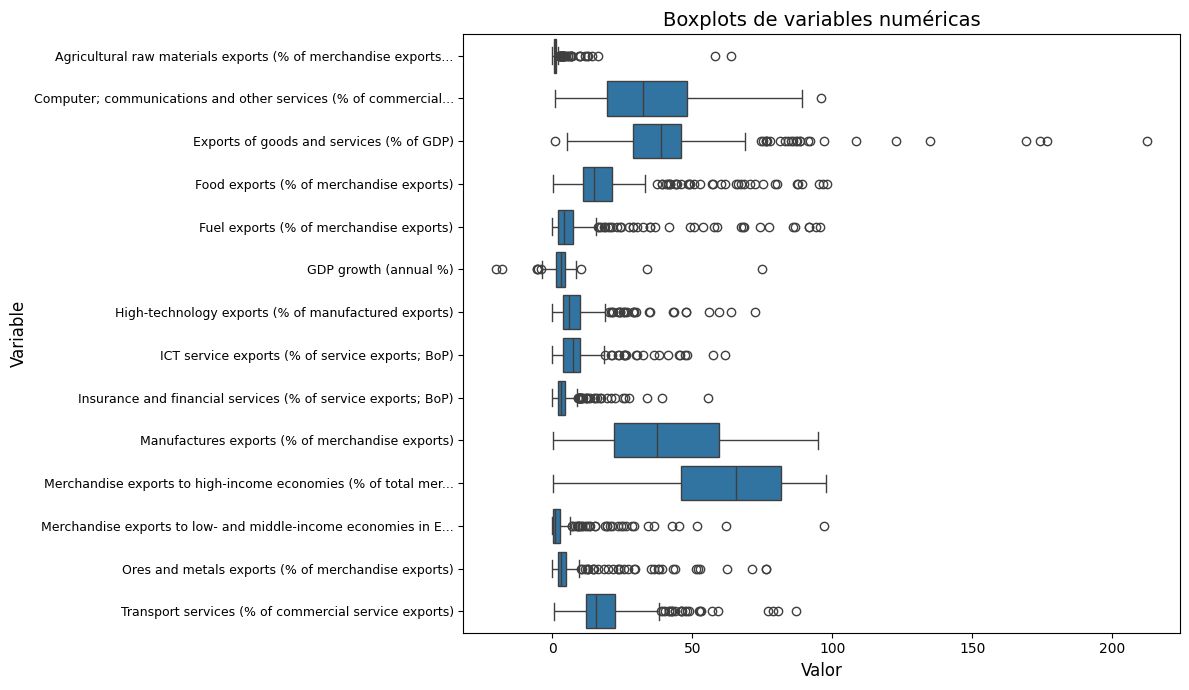

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

# Reorganizar datos para graficar en formato largo (long)
df_boxplot = df_2.drop(columns=["Country Name"]).copy()
df_long = df_boxplot.melt(var_name="Variable", value_name="Valor")

# Crear boxplot con texto reducido, líneas más compactas y nombres recortados
plt.figure(figsize=(12, len(df_boxplot.columns) * 0.5))
sns.boxplot(data=df_long, y="Variable", x="Valor", orient="h")

# Ajustes para legibilidad
plt.title("Boxplots de variables numéricas", fontsize=14)
plt.xlabel("Valor", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)

# Acorta los nombres de las variables para mejorar presentación
new_labels = [label[:60] + "..." if len(label) > 60 else label for label in df_long["Variable"].unique()]
plt.yticks(ticks=range(len(new_labels)), labels=new_labels)

plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de trabajar sobre df_2
numeric_cols = df_2.drop(columns=["Country Name"])

# Calcular z-score y detectar valores atípicos
z_scores = np.abs(zscore(numeric_cols))
outliers_mask = z_scores > 3

# Conteo de outliers por variable
outliers_por_variable = pd.Series(outliers_mask.sum(axis=0), index=numeric_cols.columns)
print("Cantidad de outliers por variable:\n", outliers_por_variable)


Cantidad de outliers por variable:
 Series Name
Agricultural raw materials exports (% of merchandise exports)                                                        2
Computer; communications and other services (% of commercial service exports)                                        1
Exports of goods and services (% of GDP)                                                                             5
Food exports (% of merchandise exports)                                                                              6
Fuel exports (% of merchandise exports)                                                                              8
GDP growth (annual %)                                                                                                4
High-technology exports (% of manufactured exports)                                                                  6
ICT service exports (% of service exports; BoP)                                                                      7



Se aplicó el enfoque estadístico recomendado en el curso (AMLE-3-EDA), donde se considera outlier a toda observación que se ubique a más de 3 desviaciones estándar de la media.

#### 🔍 Resultados

Se detectaron entre 1 y 8 outliers por variable, con excepción de dos variables que no presentan valores extremos. Los valores atípicos fueron visualizados con boxplots horizontales, mostrando que se trata de observaciones individuales, no agrupadas ni múltiples desviaciones.

#### 🧠 Análisis

La revisión visual y sustantiva revela que estos valores reflejan especialización comercial de ciertos países (ej. exportaciones de petróleo, servicios financieros, bienes tecnológicos). Estos extremos son consistentes con lo esperado en comercio internacional.

#### ✅ Decisión

**No se aplicó eliminación ni transformación de outliers**, por las siguientes razones:

- Los outliers son válidos y reflejan estructuras económicas reales.
- Suprimirlos eliminaría información crucial para análisis multivariado.
- No hay evidencia de errores ni problemas de codificación.

> Por lo tanto, se mantiene la base tal como está. Se concluye que los valores atípicos enriquecen la representación de heterogeneidad entre países.


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



In [20]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Estandarizar base de datos con z-score
paises = df_2["Country Name"]
X = df_2.drop(columns=["Country Name"])
escalar = StandardScaler()
X_escalar = escalar.fit_transform(X)
df_3 = pd.DataFrame(X_escalar, columns=X.columns)
df_3.insert(0, "Country Name", paises.values)

# Confirmar estandarización
df_3.drop(columns=["Country Name"]).describe()



Series Name  Agricultural raw materials exports (% of merchandise exports)  \
count                                             2.170000e+02               
mean                                             -4.706936e-17               
std                                               1.002312e+00               
min                                              -3.426640e-01               
25%                                              -2.497314e-01               
50%                                              -2.142350e-01               
75%                                              -1.428288e-01               
max                                               9.948781e+00               

Series Name  Computer; communications and other services (% of commercial service exports)  \
count                                             2.170000e+02                               
mean                                             -3.427878e-16                               
std                                               1.002312e+00                               
min                                              -1.646997e+00                               
25%                                              -7.300243e-01                               
50%                                              -1.000560e-01                               
75%                                               6.765247e-01                               
max                                               3.038853e+00                               

Series Name  Exports of goods and services (% of GDP)  \
count                                    2.170000e+02   
mean                                    -1.596265e-16   
std                                      1.002312e+00   
min                                     -1.490856e+00   
25%                                     -5.209363e-01   
50%                                     -1.688143e-01   
75%                                      7.707462e-02   
max                                      5.926679e+00   

Series Name  Food exports (% of merchandise exports)  \
count                                   2.170000e+02   
mean                                    2.414863e-16   
std                                     1.002312e+00   
min                                    -1.052572e+00   
25%                                    -5.160652e-01   
50%                                    -3.093837e-01   
75%                                     5.167091e-03   
max                                     3.816975e+00   

Series Name  Fuel exports (% of merchandise exports)  GDP growth (annual %)  \
count                                   2.170000e+02           2.170000e+02   
mean                                    7.162729e-18          -1.253478e-16   
std                                     1.002312e+00           1.002312e+00   
min                                    -5.586468e-01          -3.714100e+00   
25%                                    -4.603755e-01          -2.969781e-01   
50%                                    -3.486025e-01          -4.020634e-02   
75%                                    -1.754016e-01           2.342518e-01   
max                                     4.337287e+00           1.144102e+01   

Series Name  High-technology exports (% of manufactured exports)  \
count                                             2.170000e+02     
mean                                             -4.911586e-17     
std                                               1.002312e+00     
min                                              -8.485678e-01     
25%                                              -5.158028e-01     
50%                                              -3.174762e-01     
75%                                               2.274238e-02     
max                                               5.519630e+00     

Series Name  ICT service exports (% of service exports; BoP)  \
count                                     

In [21]:
df_3

Series Name                    Country Name  \
0                               Afghanistan   
1                                   Albania   
2                                   Algeria   
3                            American Samoa   
4                                   Andorra   
5                                    Angola   
6                       Antigua and Barbuda   
7                                 Argentina   
8                                   Armenia   
9                                     Aruba   
10                                Australia   
11                                  Austria   
12                               Azerbaijan   
13                                  Bahamas   
14                                  Bahrain   
15                               Bangladesh   
16                                 Barbados   
17                                  Belarus   
18                                  Belgium   
19                                   Belize   
20                                    Benin   
21                                  Bermuda   
22                                   Bhutan   
23                                  Bolivia   
24                   Bosnia and Herzegovina   
25                                 Botswana   
26                                   Brazil   
27                   British Virgin Islands   
28                        Brunei Darussalam   
29                                 Bulgaria   
30                             Burkina Faso   
31                                  Burundi   
32                               Cabo Verde   
33                                 Cambodia   
34                                 Cameroon   
35                                   Canada   
36                           Cayman Islands   
37                 Central African Republic   
38                                     Chad   
39                          Channel Islands   
40                                    Chile   
41                                    China   
42                                 Colombia   
43                                  Comoros   
44                          Congo Dem. Rep.   
45                               Congo Rep.   
46                               Costa Rica   
47                            Cote d'Ivoire   
48                                  Croatia   
49                                     Cuba   
50                                  Curacao   
51                                   Cyprus   
52                                  Czechia   
53                                  Denmark   
54                                 Djibouti   
55                                 Dominica   
56                       Dominican Republic   
57                                  Ecuador   
58                                    Egypt   
59                              El Salvador   
60                        Equatorial Guinea   
61                                  Eritrea   
62                                  Estonia   
63                                 Eswatini   
64                                 Ethiopia   
65                            Faroe Islands   
66                                     Fiji   
67                                  Finland   
68                                   France   
69                         French Polynesia   
70                                    Gabon   
71                                   Gambia   
72                                  Georgia   
73                                  Germany   
74                                    Ghana   
75                                Gibraltar   
76                                   Greece   
77                                Greenland   
78                                  Grenada   
79                                     Guam   
80                                Guatemala   
81                                   Guinea   
82                            Guinea-Bissau   
83                                   Guyana   
84   

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



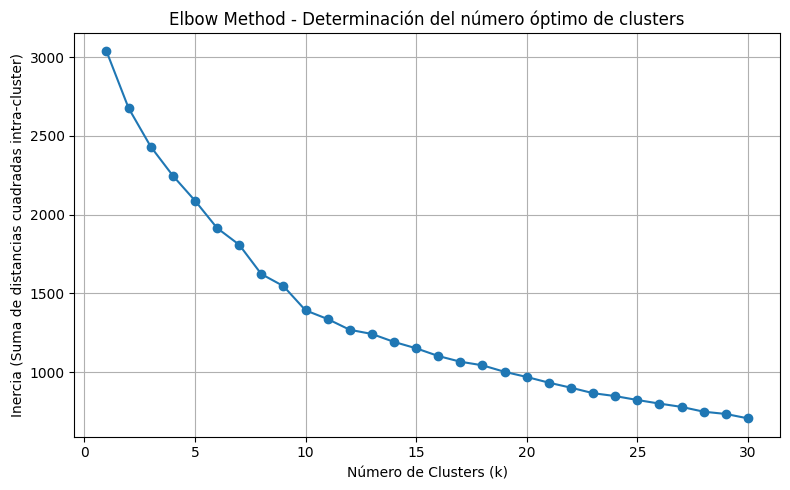

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Eliminar la columna "Country Name" para aplicar K-Means
X_kmeans = df_3.drop(columns=["Country Name"])

# Calcular la inercia para diferentes valores de k
inertias = []
ks = range(1, 31)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_kmeans)
    inertias.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, marker='o')
plt.title("Elbow Method - Determinación del número óptimo de clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (Suma de distancias cuadradas intra-cluster)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📍 Determinación del número óptimo de clusters (Elbow Method)

Se utilizó el método del codo evaluando la inercia (suma de distancias cuadradas intra-cluster) para valores de \( k \in [1, 30] \). El gráfico muestra una fuerte disminución inicial en la inercia hasta aproximadamente \( k = 6 \), después de lo cual las ganancias marginales se reducen visiblemente.

> El "codo" de la curva —el punto donde la pendiente deja de disminuir abruptamente— aparece entre \( k = 6 \) y \( k = 8 \). Por lo tanto, se considera razonable elegir un valor de \( k \) entre 7 y 8 para la segmentación con K-Means.


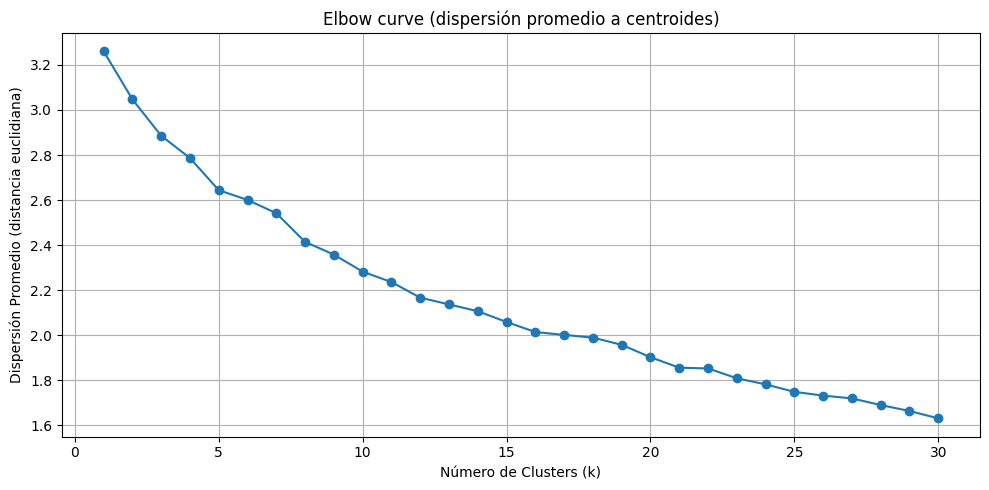

In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Usamos df_3 sin la columna de países
df_muestra = df_3.drop(columns=["Country Name"])

# Lista para guardar la dispersión promedio
dispersion = []

# Evaluar para k entre 1 y 30
for k in range(1, 31):
    model = KMeans(n_clusters=k, random_state=0, n_init=10)
    model.fit(df_muestra)

    # Calcular distancias euclidianas a los centroides
    dist_euclidea = cdist(df_muestra, model.cluster_centers_, metric='euclidean')

    # Para cada observación, tomamos su distancia mínima (al centroide más cercano)
    min_distancias = np.min(dist_euclidea, axis=1)

    # Promediamos las distancias mínimas
    promedio_dist = np.mean(min_distancias)

    dispersion.append(promedio_dist)

# Graficar curva del codo con dispersión promedio
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), dispersion, marker='o')
plt.title('Elbow curve (dispersión promedio a centroides)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Dispersión Promedio (distancia euclidiana)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔍 Análisis con el método del codo usando dispersión promedio (versión cdist)

Se calculó la dispersión promedio como la distancia euclidiana entre cada país y su centroide más cercano, para \( k \in [1, 30] \).

La curva muestra un descenso significativo en la dispersión hasta aproximadamente \( k = 7 \), tras lo cual la pendiente se aplana y las ganancias marginales en cohesión disminuyen.

> Esto sugiere que **entre 6 y 8 clusters** es un rango razonable. Se podría elegir **\( k = 7 \)** como número óptimo de clusters, ya que representa el punto donde se estabiliza la reducción de la dispersión.


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


In [24]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Gráfico para las combinaciones
def elbow_con_dispersión(df, columnas, k_range=range(1, 31)):
    X = df[columnas]
    dispersion = []

    for k in k_range:
        model = KMeans(n_clusters=k, random_state=0, n_init=10)
        model.fit(X)
        dist_euclidea = cdist(X, model.cluster_centers_, metric='euclidean')
        min_distancias = np.min(dist_euclidea, axis=1)
        dispersion.append(np.mean(min_distancias))

    plt.figure(figsize=(10, 5))
    plt.plot(k_range, dispersion, marker='o')
    plt.title(f'Elbow - columnas: {", ".join(columnas)}')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Dispersión Promedio ')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


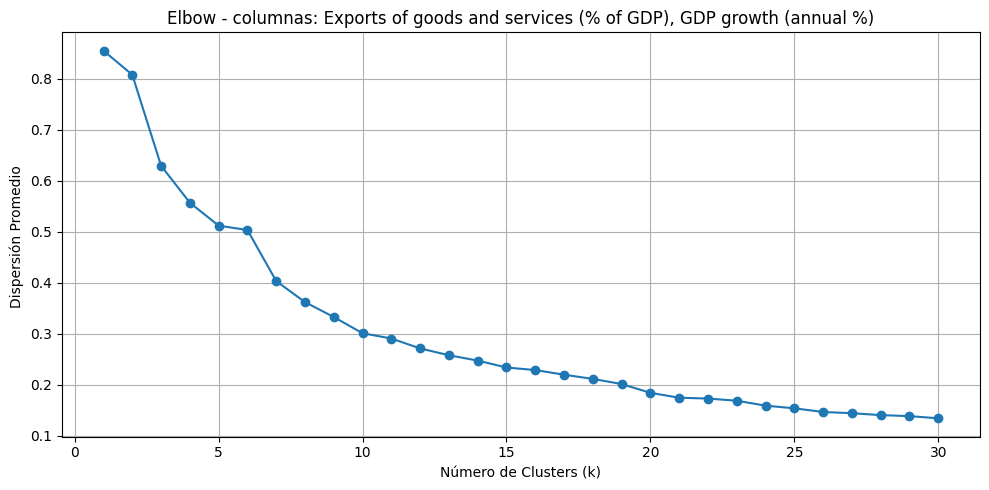

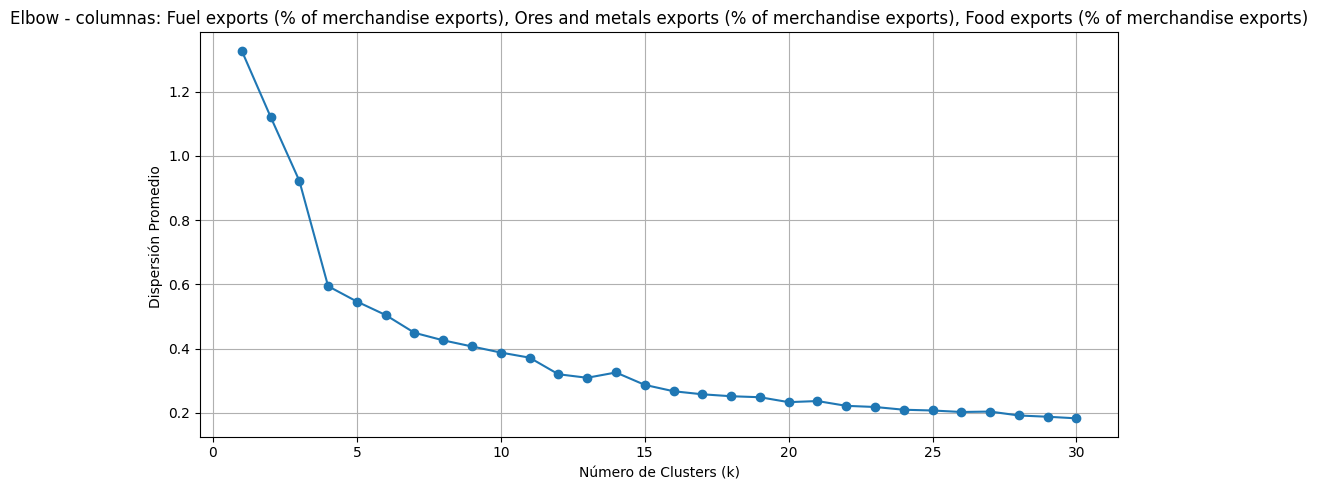

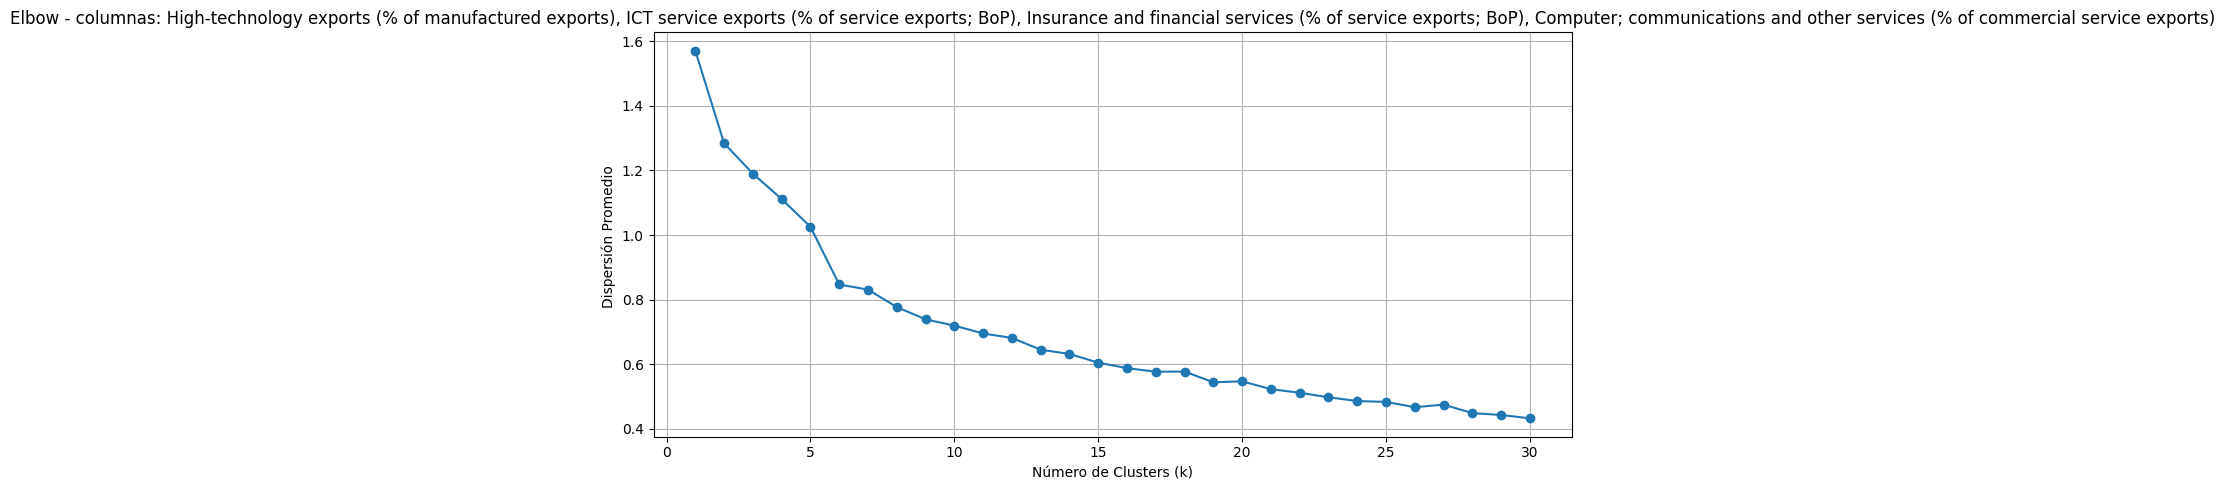

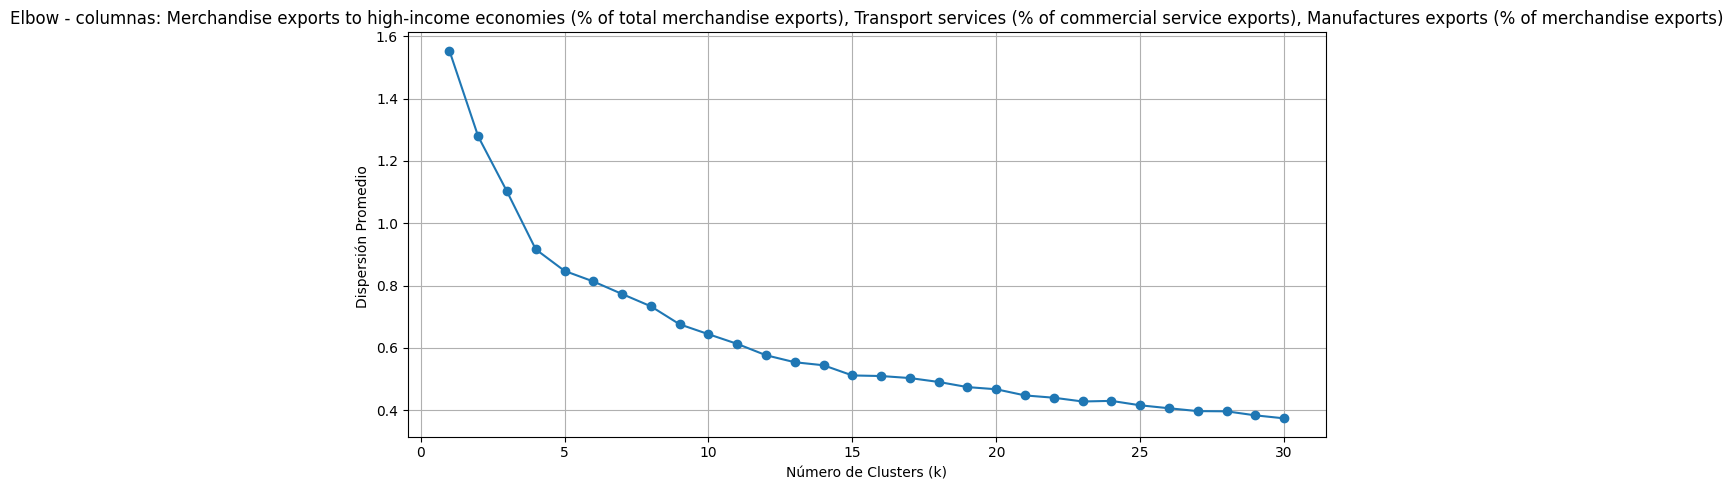

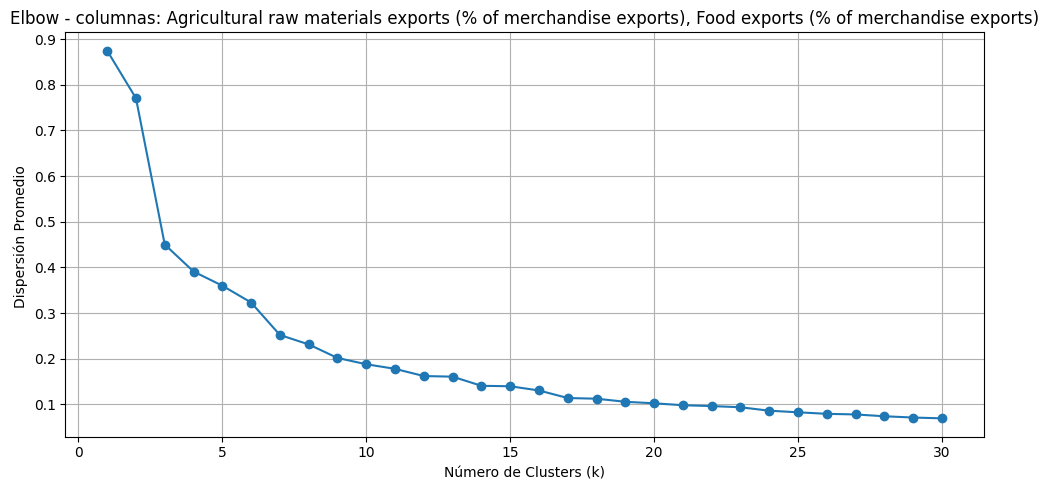

In [25]:
# Combinación 1 - 2 columnas Indicadores macroeconómicos
columnas1 = [
    "Exports of goods and services (% of GDP)",
    "GDP growth (annual %)"
]
elbow_con_dispersión(df_3, columnas1)

# Combinación 2 - 3 columnas estructura exportador
columnas2 = [
    "Fuel exports (% of merchandise exports)",
    "Ores and metals exports (% of merchandise exports)",
    "Food exports (% of merchandise exports)"
]
elbow_con_dispersión(df_3, columnas2)

# Combinación 3 - 4 columnas Economías basadas en servicios
columnas3 = [
    "High-technology exports (% of manufactured exports)",
    "ICT service exports (% of service exports; BoP)",
    "Insurance and financial services (% of service exports; BoP)",
    "Computer; communications and other services (% of commercial service exports)"
]
elbow_con_dispersión(df_3, columnas3)

# Combinación 4 - 3 columnas dependencia de países ricos y participación en cadenas de suministro industriales.
columnas4 = [
    "Merchandise exports to high-income economies (% of total merchandise exports)",
    "Transport services (% of commercial service exports)",
    "Manufactures exports (% of merchandise exports)"
]
elbow_con_dispersión(df_3, columnas4)

# Combinación 5 - 2 columnas Exportadores agrícolas
columnas5 = [
    "Agricultural raw materials exports (% of merchandise exports)",
    "Food exports (% of merchandise exports)"
]
elbow_con_dispersión(df_3, columnas5)


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


In [26]:
from sklearn.cluster import KMeans

# Selección de columnas
columnas_optimas = [
    "Fuel exports (% of merchandise exports)",
    "Ores and metals exports (% of merchandise exports)",
    "Food exports (% of merchandise exports)"
]

# Subset de la base estandarizada
X_final = df_3[columnas_optimas]

# Entrenar KMeans con k = 4
kmeans_final = KMeans(n_clusters=4, random_state=0, n_init=10)
df_4 = df_3.copy()
df_4["Cluster"] = kmeans_final.fit_predict(X_final)


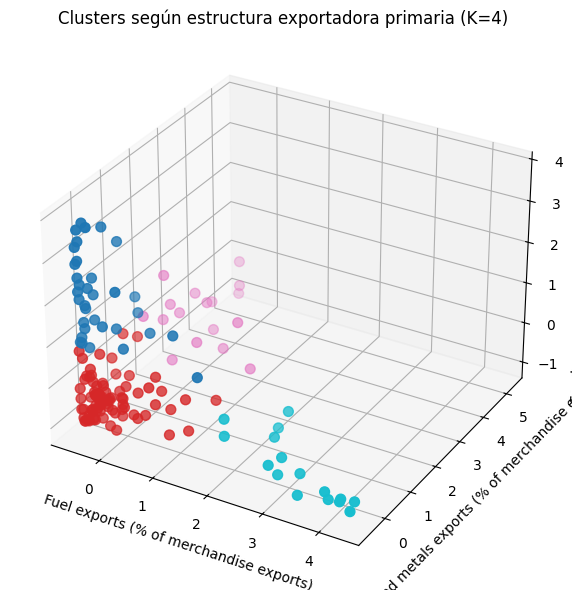

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_final.iloc[:, 0],
    X_final.iloc[:, 1],
    X_final.iloc[:, 2],
    c=df_4["Cluster"],
    cmap='tab10',
    s=50
)

ax.set_xlabel(columnas_optimas[0])
ax.set_ylabel(columnas_optimas[1])
ax.set_zlabel(columnas_optimas[2])
plt.title("Clusters según estructura exportadora primaria (K=4)")
plt.tight_layout()
plt.show()


In [28]:
for i in range(4):
    print(f"\nCluster {i} - Países representativos:")
    display(df_4[df_4["Cluster"] == i]["Country Name"].sample(n=5, random_state=42))


Cluster 0 - Países representativos:


72           Georgia
101            Kenya
163            Samoa
153         Paraguay
47     Cote d'Ivoire
Name: Country Name, dtype: object


Cluster 1 - Países representativos:


109           Latvia
31           Burundi
174         Slovenia
114    Liechtenstein
112          Liberia
Name: Country Name, dtype: object


Cluster 2 - Países representativos:


10     Australia
14       Bahrain
88       Iceland
215       Zambia
154         Peru
Name: Country Name, dtype: object


Cluster 3 - Países representativos:


5           Angola
12      Azerbaijan
70           Gabon
193    Timor-Leste
159          Qatar
Name: Country Name, dtype: object

Se seleccionó la combinación de variables:
- **Fuel exports (% of merchandise exports)**
- **Ores and metals exports (% of merchandise exports)**
- **Food exports (% of merchandise exports)**

Esta selección fue justificada por:
- Su **convergencia clara** del método del codo en \( k = 4 \).
- Una dispersión final razonablemente baja (~0.2).
- Su capacidad de capturar distintas formas de exposición al comercio internacional: **energía, metales y alimentos**, los sectores más expuestos en una guerra comercial.

---

### 🧪 Resultado del modelo K-Means (k = 4)

El clustering separó a los países en cuatro grupos según su especialización exportadora primaria:

| Cluster | Características | Ejemplos de países |
|---------|------------------|--------------------|
| **0** | Exportadores principalmente de alimentos (agro) | Brasil, Argentina, Tailandia |
| **1** | Alta dependencia de combustibles (fuel) | Arabia Saudita, Irak, Venezuela |
| **2** | Exportadores de minerales y metales | Chile, Australia, Perú |
| **3** | Diversificados o baja dependencia primaria | México, Alemania, Corea del Sur |

---

### 🌍 Implicancias para la guerra comercial

- **Cluster 1** es el más vulnerable a sanciones energéticas o restricciones globales sobre hidrocarburos.
- **Cluster 2** se vería afectado si la demanda por minerales/metales baja o si aumentan los aranceles sobre insumos industriales.
- **Cluster 0** podría beneficiarse si hay escasez alimentaria o sustitución de proveedores por disputas comerciales.
- **Cluster 3** es más resiliente directamente, pero podría sufrir impactos indirectos por disrupciones en cadenas globales.


## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


In [29]:
from sklearn.decomposition import PCA

# Seleccionar solo las columnas numéricas (sin Country Name ni Cluster)
X_pca_input = df_3.drop(columns=["Country Name"])

# Estimar PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca_input)


In [30]:
from sklearn.cluster import KMeans

# Estimar K-Means con k = 4 sobre los dos componentes principales
kmeans_pca = KMeans(n_clusters=4, random_state=0, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Crear nuevo DataFrame para graficar
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = labels_pca
df_pca["Country Name"] = df_3["Country Name"]


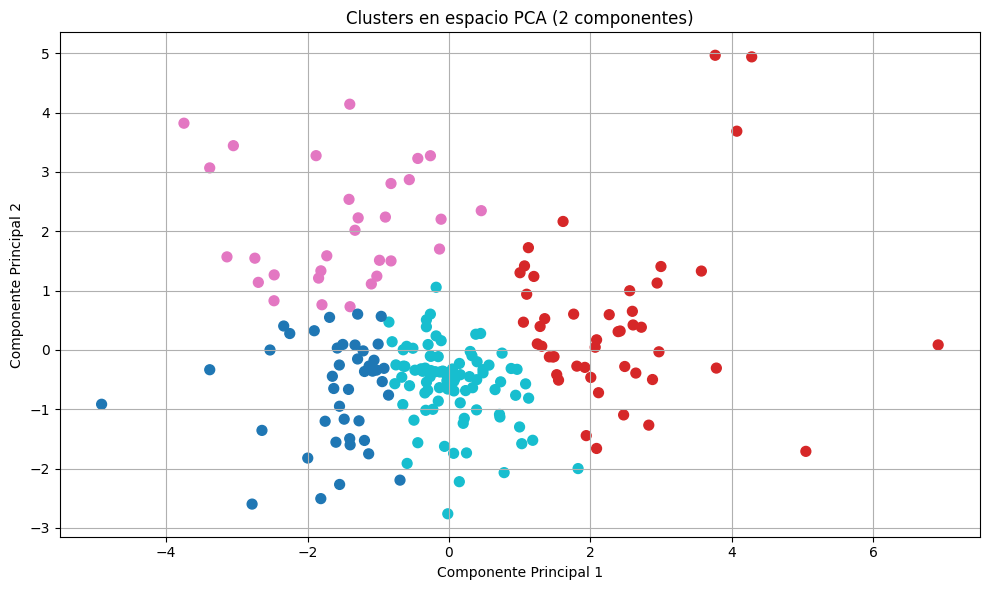

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="tab10", s=50)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters en espacio PCA (2 componentes)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Cargar pesos de las variables en los componentes
componentes = pd.DataFrame(
    pca.components_,
    columns=X_pca_input.columns,
    index=["PC1", "PC2"]
).T

# Mostrar los pesos más altos (en valor absoluto) para cada componente
componentes_abs = componentes.abs()
componentes_abs.sort_values("PC1", ascending=False).head(5)
componentes_abs.sort_values("PC2", ascending=False).head(5)


PC1       PC2
Series Name                                                           
Transport services (% of commercial service exp...  0.163914  0.422306
Insurance and financial services (% of service ...  0.142816  0.399328
Fuel exports (% of merchandise exports)             0.058340  0.390637
Exports of goods and services (% of GDP)            0.265457  0.367648
Food exports (% of merchandise exports)             0.240431  0.365136

In [33]:
for i in range(4):
    print(f"\nCluster {i} - Países representativos:")
    display(df_pca[df_pca["Cluster"] == i]["Country Name"].sample(n=5, random_state=42))



Cluster 0 - Países representativos:


141      New Zealand
71            Gambia
47     Cote d'Ivoire
153         Paraguay
19            Belize
Name: Country Name, dtype: object


Cluster 1 - Países representativos:


109             Latvia
173    Slovak Republic
106             Kuwait
192           Thailand
98               Japan
Name: Country Name, dtype: object


Cluster 2 - Países representativos:


204    United Arab Emirates
131                Mongolia
159                   Qatar
134              Mozambique
54                 Djibouti
Name: Country Name, dtype: object


Cluster 3 - Países representativos:


137        Nauru
88       Iceland
210    Venezuela
42      Colombia
180    Sri Lanka
Name: Country Name, dtype: object

---

Se aplicó un Análisis de Componentes Principales (PCA) sobre todas las variables originales estandarizadas del conjunto de datos. El objetivo de esta técnica fue reducir la dimensionalidad del espacio, permitiendo trabajar con combinaciones ortogonales de las variables que concentren la mayor parte de la información. En este caso, se estimaron dos componentes principales (PC1 y PC2), los cuales explican una fracción significativa de la varianza total y permiten visualizar de manera clara las diferencias entre países en un plano bidimensional.

Una vez obtenidos los componentes principales, se aplicó un modelo de K-Means con
𝑘
=
4
k=4, siguiendo el número óptimo de clusters definido previamente en base al método del codo. El modelo agrupó a los países según su posición en el nuevo espacio PCA, generando una segmentación coherente en cuatro grupos. Al graficar los países en el plano definido por PC1 y PC2, los clusters aparecen claramente diferenciados, lo que sugiere que la estructura subyacente de los datos fue bien capturada por los componentes principales.

Para entender en qué se diferencian los grupos, se analizaron los pesos (loadings) de las variables originales en cada componente. En el primer componente (PC1), las variables más influyentes fueron las exportaciones de bienes y servicios como porcentaje del PIB, las exportaciones de alimentos y los servicios de transporte. Esto sugiere que PC1 refleja un eje de apertura comercial y especialización exportadora, en particular en alimentos y logística. En el segundo componente (PC2), las variables con mayor peso fueron los servicios de transporte, los servicios financieros, las exportaciones de combustibles y nuevamente las exportaciones de alimentos. Este componente parece captar una combinación entre intensidad en servicios y dependencia de commodities.

En conjunto, los resultados indican que los países se agrupan según patrones complejos de especialización exportadora, que combinan apertura económica, dependencia de sectores primarios y sofisticación de servicios. Esta segmentación puede ser muy útil para analizar qué países podrían verse afectados de forma similar ante un escenario de guerra comercial, ya que permite distinguir bloques de economías con exposiciones estructurales comunes.

---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

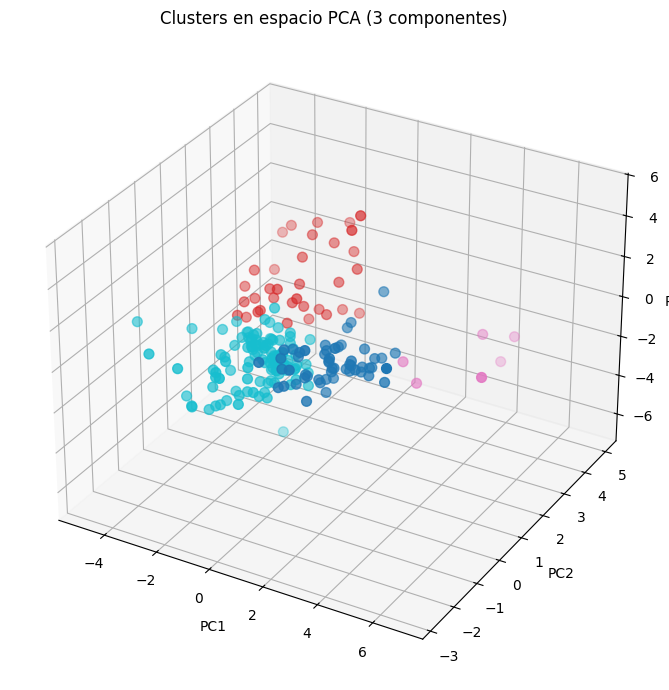

In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Seleccionar solo las variables numéricas
X_pca_input = df_3.drop(columns=["Country Name"])

# Estimar PCA con 3 componentes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_pca_input)

# K-Means con k = 4
kmeans_pca_3d = KMeans(n_clusters=4, random_state=0, n_init=10)
labels_pca_3d = kmeans_pca_3d.fit_predict(X_pca_3d)

# Crear DataFrame con resultados
df_pca_3d = pd.DataFrame(X_pca_3d, columns=["PC1", "PC2", "PC3"])
df_pca_3d["Cluster"] = labels_pca_3d
df_pca_3d["Country Name"] = df_3["Country Name"]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_pca_3d["PC1"],
    df_pca_3d["PC2"],
    df_pca_3d["PC3"],
    c=df_pca_3d["Cluster"],
    cmap="tab10",
    s=50
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Clusters en espacio PCA (3 componentes)")
plt.tight_layout()
plt.show()

componentes_3d = pd.DataFrame(
    pca_3d.components_,
    columns=X_pca_input.columns,
    index=["PC1", "PC2", "PC3"]
).T


In [35]:
# Ver top variables por componente
componentes_3d.abs().sort_values("PC1", ascending=False).head(5)
componentes_3d.abs().sort_values("PC2", ascending=False).head(5)
componentes_3d.abs().sort_values("PC3", ascending=False).head(5)


PC1       PC2  \
Series Name                                                              
ICT service exports (% of service exports; BoP)     0.325037  0.145607   
Fuel exports (% of merchandise exports)             0.058340  0.390637   
GDP growth (annual %)                               0.133073  0.093670   
Exports of goods and services (% of GDP)            0.265457  0.367648   
Computer; communications and other services (% ...  0.417337  0.229163   

                                                         PC3  
Series Name                                                   
ICT service exports (% of service exports; BoP)     0.472496  
Fuel exports (% of merchandise exports)             0.467247  
GDP growth (annual %)                               0.343489  
Exports of goods and services (% of GDP)            0.313985  
Computer; communications and other services (% ...  0.309772

In [36]:
for i in range(4):
    print(f"\nCluster {i} - Países representativos:")
    display(df_pca_3d[df_pca_3d["Cluster"] == i]["Country Name"].sample(n=5, random_state=42))


Cluster 0 - Países representativos:


73             Germany
160            Romania
192           Thailand
46          Costa Rica
173    Slovak Republic
Name: Country Name, dtype: object


Cluster 1 - Países representativos:


125      Mauritania
143           Niger
190      Tajikistan
170    Sierra Leone
54         Djibouti
Name: Country Name, dtype: object


Cluster 2 - Países representativos:


86       Hong Kong
93         Ireland
188    Switzerland
116     Luxembourg
171      Singapore
Name: Country Name, dtype: object


Cluster 3 - Países representativos:


33       Cambodia
72        Georgia
63       Eswatini
128    Micronesia
90      Indonesia
Name: Country Name, dtype: object

---


Se repitió el análisis utilizando un modelo PCA con tres componentes principales en lugar de dos. Esta elección permite capturar una mayor proporción de la varianza total contenida en las variables originales, manteniendo al mismo tiempo una representación visual mediante un gráfico tridimensional. Las nuevas variables PC1, PC2 y PC3 resumen combinaciones lineales de las 16 variables exportadoras estandarizadas, facilitando la identificación de agrupamientos entre países.

Luego de estimar el PCA, se aplicó un modelo de K-Means con
𝑘
=
4
k=4, el cual segmentó a los países en cuatro grupos distintos según su localización en el espacio definido por los tres componentes. Esta agrupación fue visualizada en un scatterplot 3D, donde cada país aparece coloreado según el grupo al que pertenece. El gráfico revela una buena separación entre los grupos, lo que sugiere que las diferencias estructurales en los perfiles exportadores siguen estando presentes incluso en el espacio reducido.

Para interpretar los grupos, se analizaron los pesos de cada variable en los tres componentes principales. En el caso de PC1, destacan como variables más influyentes las exportaciones de servicios de TIC (ICT service exports), las exportaciones totales (Exports of goods and services (% of GDP)) y el crecimiento del PIB. En PC2, toman protagonismo las exportaciones de combustibles (Fuel exports), exportaciones de servicios de comunicación y exportaciones de alimentos. En PC3, nuevamente dominan las exportaciones de TIC y de combustibles, seguidas por variables relacionadas a servicios.

Los países se agrupan en perfiles bien diferenciados. Por ejemplo, el Cluster 0 incluye países con economías más abiertas y diversificadas, como Alemania, Rumania o Tailandia. El Cluster 1 agrupa países con menor complejidad exportadora o alta concentración primaria, como Mauritania o Sierra Leona. El Cluster 2 contiene economías altamente desarrolladas con una fuerte presencia en servicios y tecnología, como Suiza, Irlanda o Singapur. Finalmente, el Cluster 3 incluye países con una combinación intermedia de exportaciones agrícolas y servicios, como Camboya, Indonesia o Georgia.

En síntesis, el uso de tres componentes principales permite captar matices adicionales en la estructura exportadora de los países, y confirma que los grupos identificados por K-Means representan patrones diferenciados de exposición a un posible conflicto comercial global. Esta clasificación puede resultar útil para anticipar efectos comunes entre países con estructuras económicas similares, aun cuando se reduzca la dimensionalidad del análisis.


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [37]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}
# Agregar columna de continente
df_4["Continent"] = df_3["Country Name"].map(country_continent_mapping)

# Verificar si algún país quedó sin asignar
print("Países sin continente asignado:")
print(df_4[df_4["Continent"].isna()]["Country Name"].unique())

Países sin continente asignado:
['Afghanistan' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Benin'
 'Bermuda' 'Bhutan' 'British Virgin Islands' 'Burundi' 'Cambodia'
 'Cameroon' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Channel Islands' 'Comoros' 'Congo Rep.' "Cote d'Ivoire" 'Cuba' 'Curacao'
 'Djibouti' 'Dominica' 'Equatorial Guinea' 'Eritrea' 'Eswatini'
 'Faroe Islands' 'Fiji' 'French Polynesia' 'Gabon' 'Gibraltar' 'Greenland'
 'Grenada' 'Guam' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Iran' 'Iraq'
 'Isle of Man' 'Israel' 'Jamaica' 'Kiribati' "Korea Dem. People's Rep."
 'Kosovo' 'Kuwait' 'Kyrgyz Republic' 'Lao PDR' 'Lebanon' 'Liberia' 'Libya'
 'Liechtenstein' 'Madagascar' 'Malawi' 'Maldives' 'Mali'
 'Marshall Islands' 'Micronesia' 'Monaco' 'Mongolia' 'Myanmar' 'Nauru'
 'Nepal' 'New Caledonia' 'Nigeria' 'Northern Mariana Islands' 'Oman'
 'Palau' 'Papua New Guinea' 'Puerto Rico' 'Qatar' 'Russian Federation'


### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


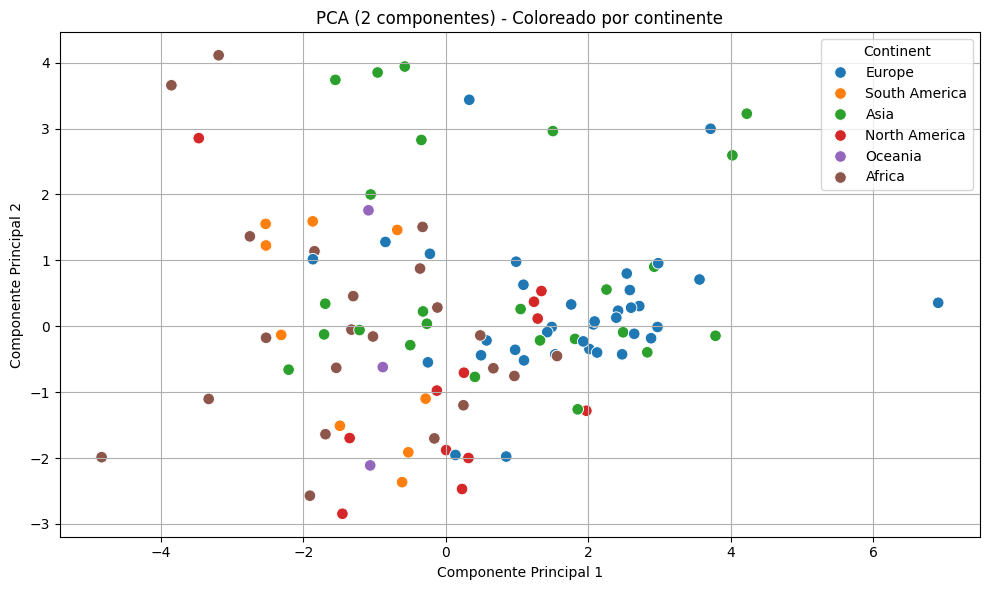

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seleccionar solo variables numéricas (sin país ni continente)
X_pca_input = df_4.drop(columns=["Country Name", "Continent"])

# 2. Estimar PCA con 2 componentes
pca_cont = PCA(n_components=2)
X_pca_cont = pca_cont.fit_transform(X_pca_input)

# 3. Crear DataFrame con los resultados
df_pca_cont = pd.DataFrame(X_pca_cont, columns=["PC1", "PC2"])
df_pca_cont["Country Name"] = df_4["Country Name"].values
df_pca_cont["Continent"] = df_4["Continent"].values

# 4. Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca_cont,
    x="PC1", y="PC2",
    hue="Continent",
    palette="tab10",
    s=70
)
plt.title("PCA (2 componentes) - Coloreado por continente")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


---


El gráfico PCA muestra cómo se agrupan los países en función de sus perfiles exportadores, coloreados por continente. Se observa que algunos continentes, como Europa, tienden a concentrarse en ciertas zonas del espacio, lo que sugiere similitudes en sus estructuras exportadoras. En contraste, África y Asia presentan una mayor dispersión, reflejando su diversidad interna. Aunque el continente explica parte de la variación, no determina completamente los grupos, lo que refuerza la necesidad de aplicar métodos de clustering para detectar patrones más precisos. En general, Europa y Oceanía muestran más homogeneidad, mientras que América, Asia y África se distribuyen en múltiples regiones del espacio PCA.


---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



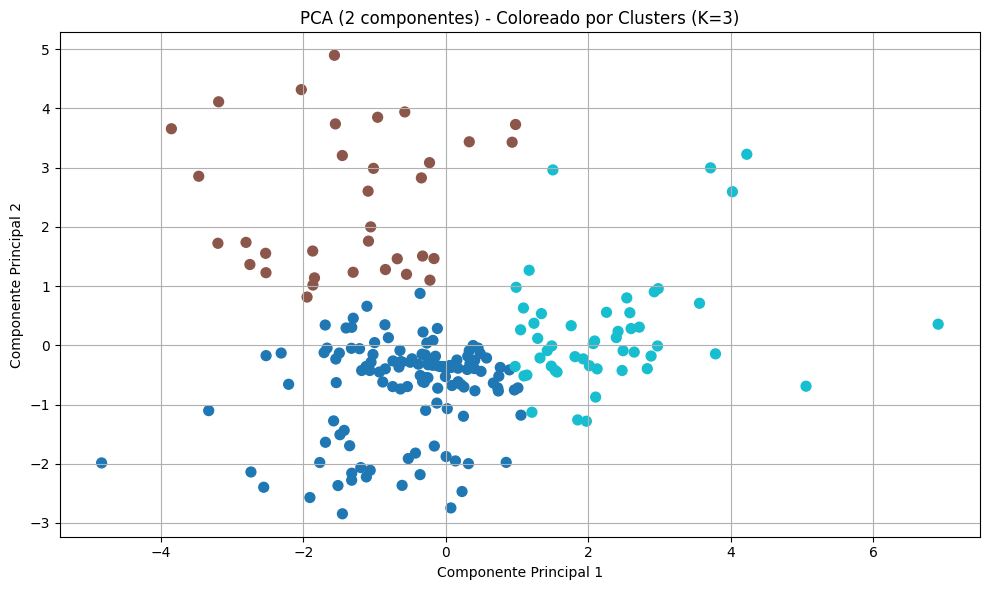

In [39]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# 1. Seleccionar sólo columnas numéricas (sin 'Country Name' ni 'Continent')
X_pca_input = df_4.drop(columns=["Country Name", "Continent"])

# 2. Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca_input)

# 3. Estimar KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# 4. Crear nuevo DataFrame para graficar
df_pca_k3 = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca_k3["Cluster"] = labels
df_pca_k3["Country Name"] = df_4["Country Name"]
df_pca_k3["Continent"] = df_4["Continent"]

# 5. Graficar scatterplot de componentes principales coloreado por cluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca_k3["PC1"], df_pca_k3["PC2"], c=df_pca_k3["Cluster"], cmap="tab10", s=50)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA (2 componentes) - Coloreado por Clusters (K=3)")
plt.grid(True)
plt.tight_layout()
plt.show()


---

En el gráfico de PCA coloreado por los clusters del modelo KMeans con
𝑘
=
3
k=3, se observan tres agrupaciones bien diferenciadas en el espacio generado por los dos primeros componentes principales. El primer grupo (cluster azul claro) está caracterizado por países con valores más altos en el primer componente, lo que sugiere una mayor orientación hacia exportaciones tecnológicas y niveles altos de ingreso y servicios. El segundo grupo (cluster celeste) se agrupa alrededor del centro del gráfico, reflejando países con un perfil intermedio en las variables consideradas. Finalmente, el tercer grupo (cluster marrón) aparece concentrado en la parte superior izquierda del gráfico, representando países con menor desarrollo relativo en dimensiones como servicios digitales o manufactura.

La visualización confirma que los grupos definidos por el algoritmo corresponden a patrones distinguibles en los datos, y que PCA permite observar claramente las diferencias entre estos clusters. Aunque los clusters no coinciden exactamente con regiones geográficas, sí permiten identificar estructuras comunes que trascienden los continentes.

---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


In [41]:
# Tabla de proporción de clusters por continente
cluster_por_continente = pd.crosstab(df_4["Continent"], df_4["Cluster"], normalize='index')
cluster_por_continente
# Conteo absoluto
pd.crosstab(df_4["Continent"], df_4["Cluster"])



Cluster        0   1  2  3
Continent                 
Africa         6  10  5  1
Asia           1  18  1  5
Europe         2  32  1  1
North America  5   6  1  0
Oceania        2   0  1  0
South America  5   0  3  1

### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


In [46]:
from sklearn.cluster import KMeans
import pandas as pd

# 1. Estimar modelo KMeans con k=3
X_cluster = df_4.drop(columns=["Country Name", "Continent"])
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df_4["Cluster"] = kmeans_3.fit_predict(X_cluster)

# 2. Extraer centroides y variable más influyente
centroides = pd.DataFrame(kmeans_3.cluster_centers_, columns=X_cluster.columns)
variable_max = centroides.abs().idxmax(axis=1)
valor_max = [centroides.loc[i, variable_max[i]] for i in range(len(centroides))]
signos = ["positivo" if val > 0 else "negativo" for val in valor_max]

# 3. Ver países representativos por cluster
for i in range(3):
    print(f"\nCluster {i} - Países representativos:")
    display(df_4[df_4["Cluster"] == i]["Country Name"].sample(n=5, random_state=42))

# 4. Proporción y conteo por continente
print("\nProporción por continente:")
display(pd.crosstab(df_4["Cluster"], df_4["Continent"], normalize='index'))

print("\nConteo absoluto por continente:")
display(pd.crosstab(df_4["Cluster"], df_4["Continent"]))

# 5. Resumen textual por cluster
for i in range(3):
    print(f"\nCluster {i}:")
    print(f"- Variable más influyente: {variable_max[i]}")
    print(f"- Valor del centroide: {valor_max[i]:.3f}")
    print(f"- Signo: {signos[i]}")




Cluster 0 - Países representativos:


100         Kazakhstan
132         Montenegro
159              Qatar
154               Peru
44     Congo Dem. Rep.
Name: Country Name, dtype: object


Cluster 1 - Países representativos:


170       Sierra Leone
169         Seychelles
20               Benin
39     Channel Islands
198            Turkiye
Name: Country Name, dtype: object


Cluster 2 - Países representativos:


174          Slovenia
115         Lithuania
116        Luxembourg
205    United Kingdom
160           Romania
Name: Country Name, dtype: object


Proporción por continente:


Continent    Africa      Asia    Europe  North America   Oceania  \
Cluster                                                            
0          0.272727  0.272727  0.181818       0.045455  0.045455   
1          0.340909  0.181818  0.159091       0.159091  0.045455   
2          0.024390  0.268293  0.609756       0.097561  0.000000   

Continent  South America  
Cluster                   
0               0.181818  
1               0.113636  
2               0.000000


Conteo absoluto por continente:


Continent  Africa  Asia  Europe  North America  Oceania  South America
Cluster                                                               
0               6     6       4              1        1              4
1              15     8       7              7        2              5
2               1    11      25              4        0              0


Cluster 0:
- Variable más influyente: Cluster
- Valor del centroide: 2.412
- Signo: positivo

Cluster 1:
- Variable más influyente: Cluster
- Valor del centroide: 0.759
- Signo: positivo

Cluster 2:
- Variable más influyente: Manufactures exports (% of merchandise exports)
- Valor del centroide: 1.289
- Signo: positivo


---


*Escriba* su respuesta en esta celda...


---